# PRCP-1009-CellphonePrice

## Problem statement 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.

## Important library

In [2]:
#Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('datasets_11167_15520_train.csv')
pd.set_option("display.max_rows",None)

In [4]:
df = df.rename(columns={"battery_power":"Battery_power","blue":"Bluetooth","clock_speed":"Clock_speed","dual_sim":"Dual_sim","fc":"Face_camera","four_g":"4G","int_memory":"Internal_memory","m_dep":"Mobile_depth","mobile_wt":"Mobile_width","n_cores":"Number_of_cores","px_height":"pixel_height","px_width":"pixel_width","ram":"Ram","sc_h":"Screen_height","sc_w":"Screen_width","talk_time":"Talk_time","three_g":"3G","touch_screen":"Touch_screen","wifi":"Wifi","price_range":"Price_range"})

In [5]:
df.head(10)

,Battery_power,Bluetooth,Clock_speed,Dual_sim,Face_camera,4G,Internal_memory,Mobile_depth,Mobile_width,Number_of_cores,...,pixel_height,pixel_width,Ram,Screen_height,Screen_width,Talk_time,3G,Touch_screen,Wifi,Price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery_power    2000 non-null   int64  
 1   Bluetooth        2000 non-null   int64  
 2   Clock_speed      2000 non-null   float64
 3   Dual_sim         2000 non-null   int64  
 4   Face_camera      2000 non-null   int64  
 5   4G               2000 non-null   int64  
 6   Internal_memory  2000 non-null   int64  
 7   Mobile_depth     2000 non-null   float64
 8   Mobile_width     2000 non-null   int64  
 9   Number_of_cores  2000 non-null   int64  
 10  pc               2000 non-null   int64  
 11  pixel_height     2000 non-null   int64  
 12  pixel_width      2000 non-null   int64  
 13  Ram              2000 non-null   int64  
 14  Screen_height    2000 non-null   int64  
 15  Screen_width     2000 non-null   int64  
 16  Talk_time        2000 non-null   int64  
 17  3G            

In [7]:
df.isnull().sum()

Battery_power      0
Bluetooth          0
Clock_speed        0
Dual_sim           0
Face_camera        0
4G                 0
Internal_memory    0
Mobile_depth       0
Mobile_width       0
Number_of_cores    0
pc                 0
pixel_height       0
pixel_width        0
Ram                0
Screen_height      0
Screen_width       0
Talk_time          0
3G                 0
Touch_screen       0
Wifi               0
Price_range        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
Clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
Dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Face_camera,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
Internal_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
Mobile_depth,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
Mobile_width,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
Number_of_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df.shape

(2000, 21)

## Exploratary data analysis

Displot 

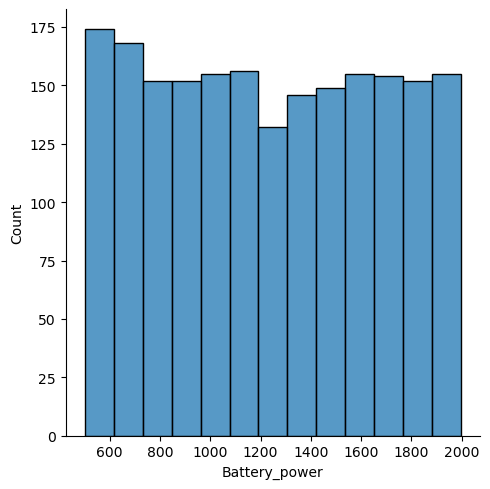

In [10]:
sns.displot(df['Battery_power'])
plt.show()

Insight

The range of battery_power are 600 to 2000

The range of 600 mah battery are widely used

The range of 1200 Mah battery are very less used


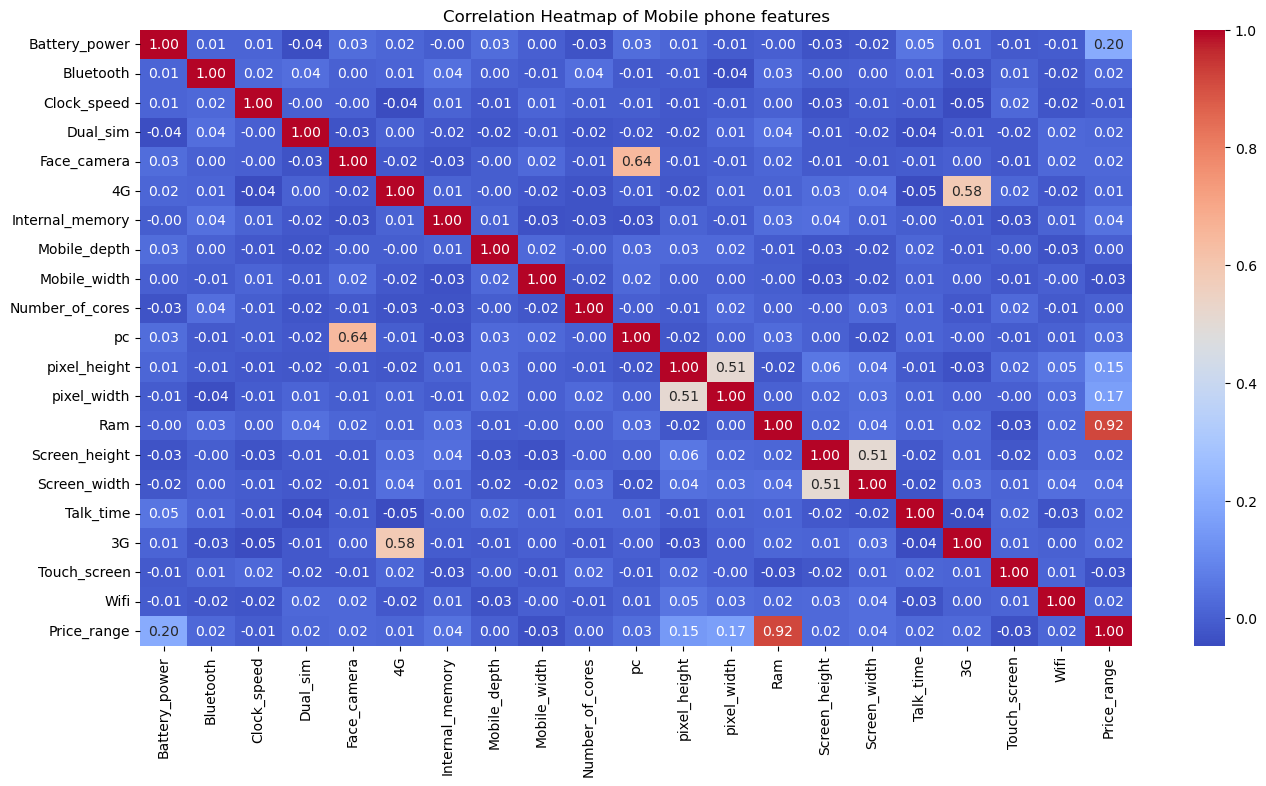

In [11]:
# Creating correlation heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, fmt='.2f',cmap='coolwarm')
plt.title("Correlation Heatmap of Mobile phone features")
plt.show()

Barplot

In [12]:
 sns.set_style('whitegrid')# Identify numeric features correlated with 'price_range'
correlated_features = df.corr()['Price_range'].sort_values(ascending=False)

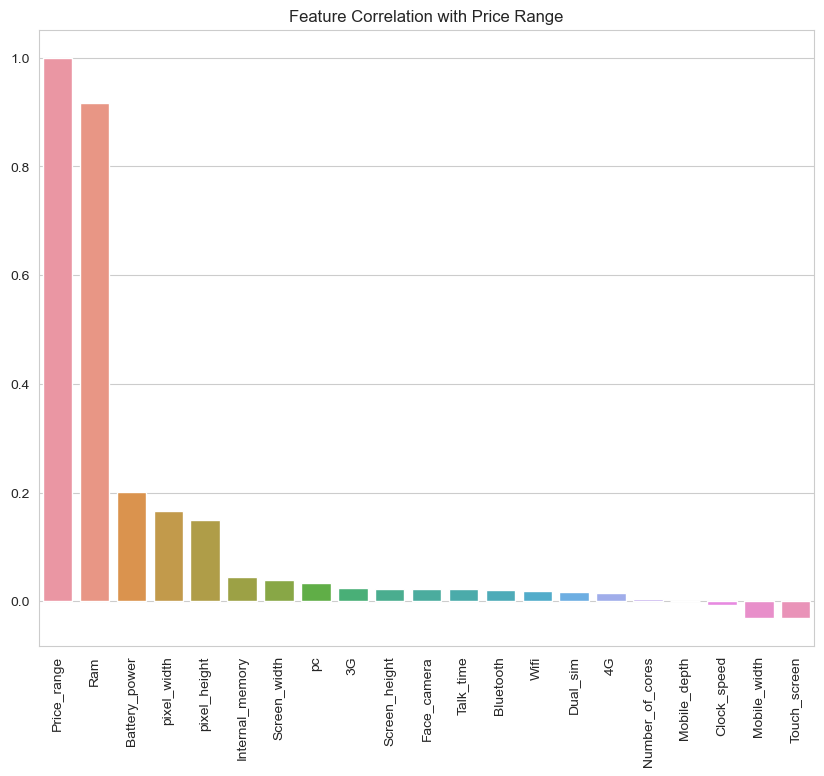

In [13]:
# bar plot for the correlation of numeric features with 'price_range'
plt.figure(figsize=(10, 8))
sns.barplot(x=correlated_features.index, y=correlated_features.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Price Range')
plt.show()

### Pairplot

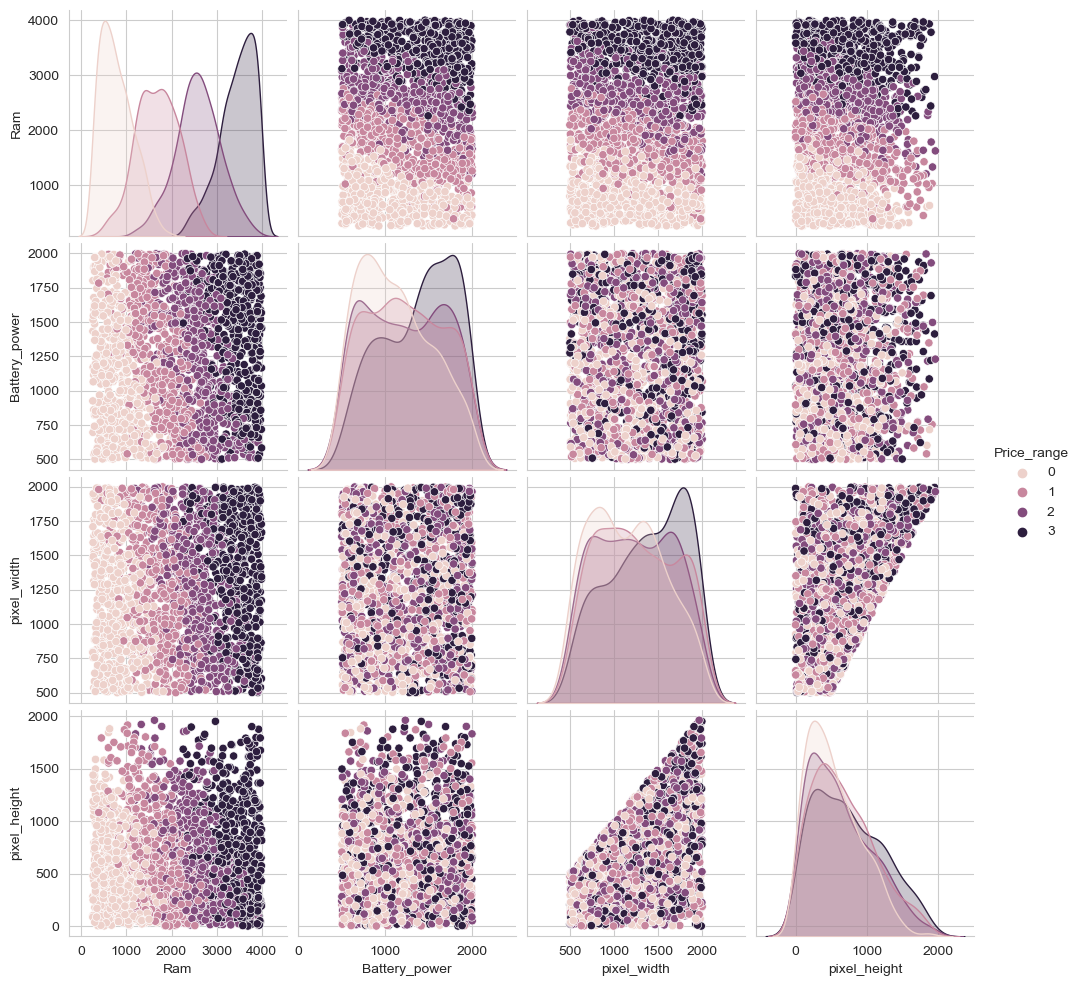

In [14]:
# Multivariate Analysis
# Pairplot for the most correlated features with 'price_range'
most_correlated_features = correlated_features.index[1:5] # Skip the first one as it is 'price_range' itself
sns.pairplot(df, vars=most_correlated_features, hue='Price_range')
plt.show()

## Checking outliers

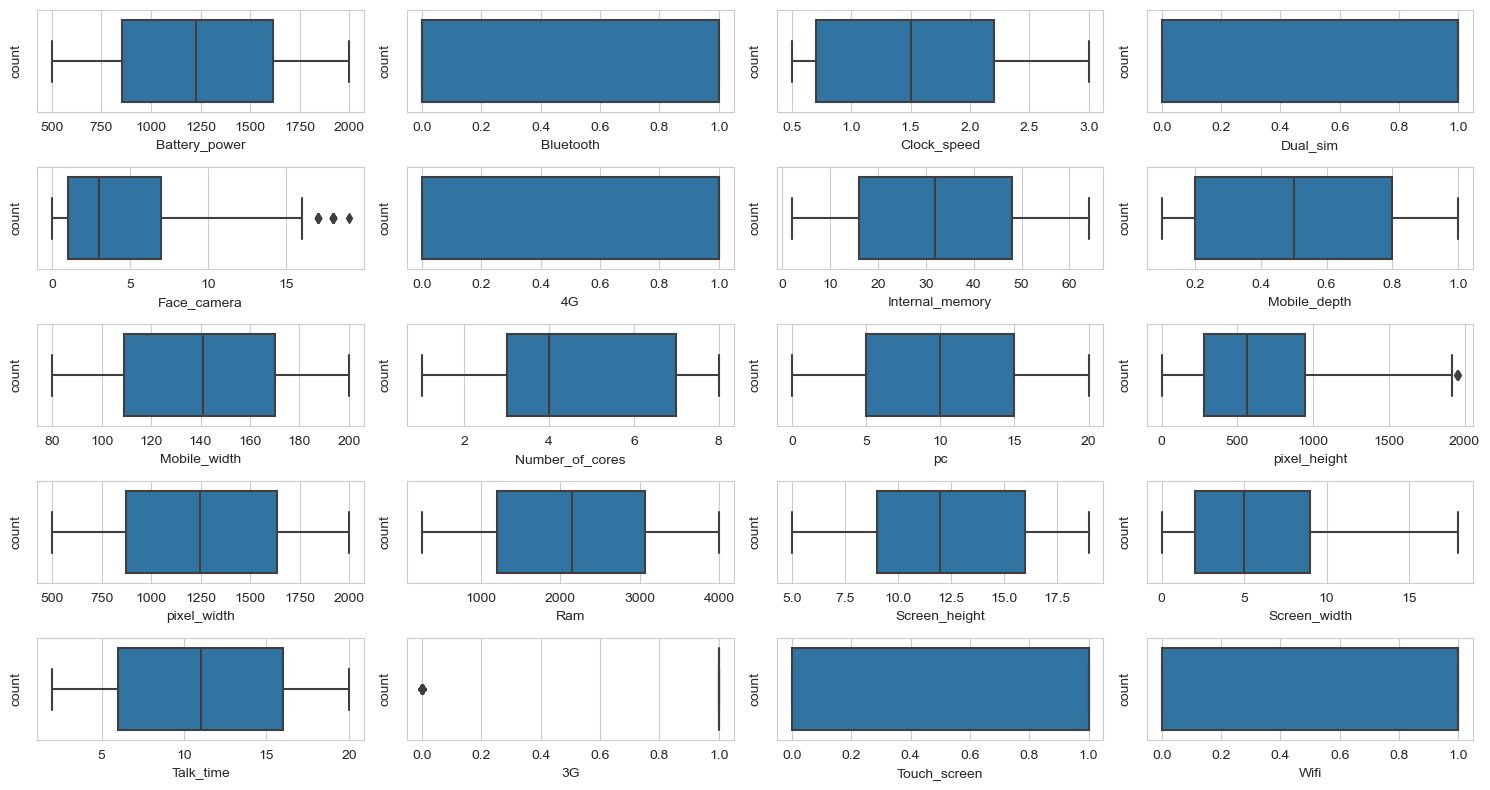

In [15]:
plt.figure(figsize=(15,8),facecolor="White")
plotnumber=1
for column in df.drop("Price_range",axis=1):
    if plotnumber<21:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=10) 
        plt.ylabel("count",fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Removing Outliers if present (imp)

<Axes: xlabel='Face_camera'>

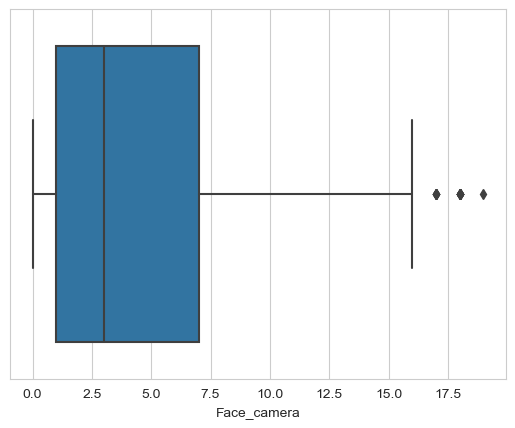

In [16]:
sns.boxplot(x='Face_camera',data=df)

<Axes: xlabel='Face_camera'>

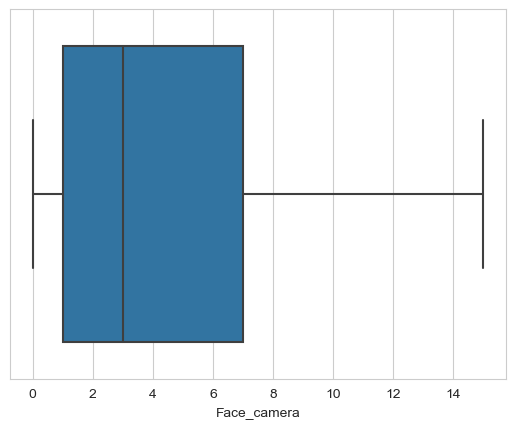

In [17]:
df.drop(df.loc[df["Face_camera"]>15].index,axis=0,inplace=True)
sns.boxplot(x='Face_camera',data=df)


<Axes: xlabel='pixel_height'>

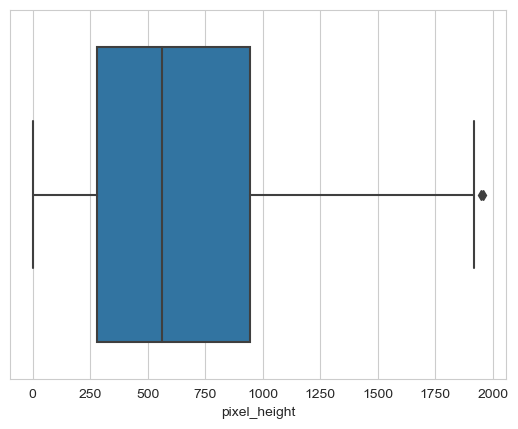

In [18]:
sns.boxplot(x='pixel_height',data=df)

<Axes: xlabel='pixel_height'>

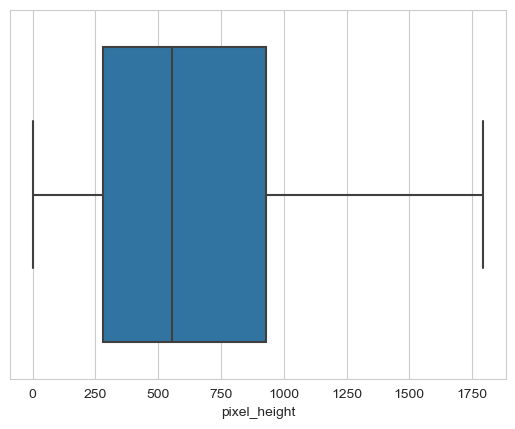

In [19]:
df.drop(df.loc[df["pixel_height"]>1800].index,axis=0,inplace=True)
sns.boxplot(x='pixel_height',data=df)

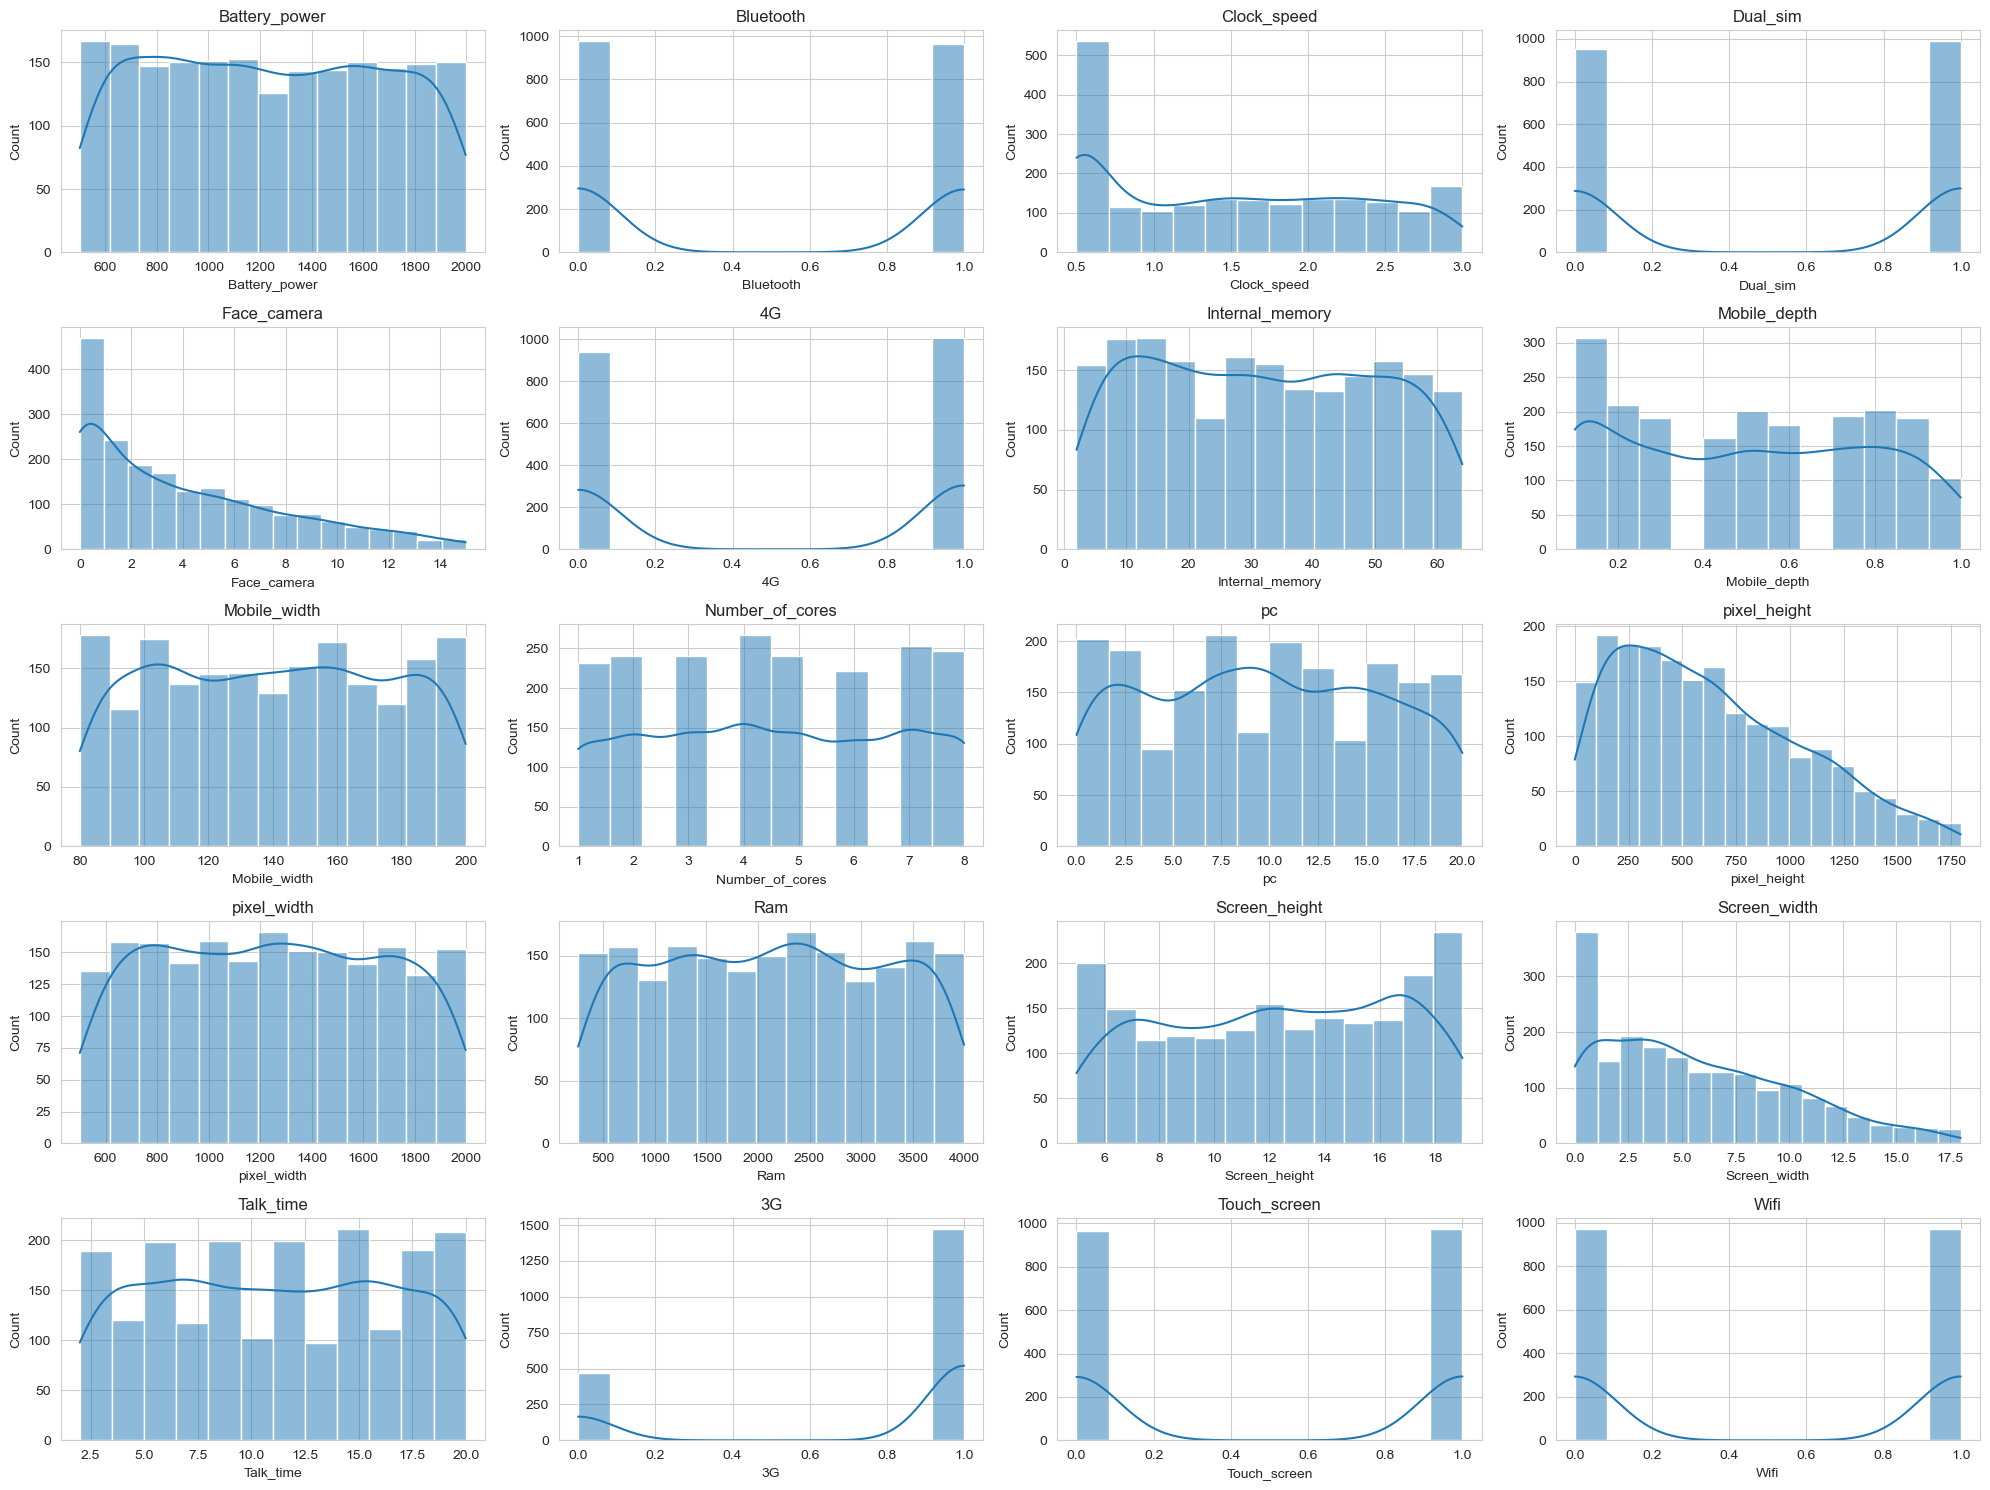

In [20]:
# Univariate Analysis
# Histograms for all numeric features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.drop('Price_range', axis=1).columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [21]:
# Defining X and y

X = df.drop(['Price_range'], axis = 1)
y = df['Price_range']
     

In [22]:
X.shape

(1941, 20)

In [23]:
y.shape

(1941,)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 42)


In [26]:
X_train.shape

(1358, 20)

In [27]:
y_train.shape

(1358,)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [29]:
#Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


In [30]:
from sklearn.metrics import classification_report
print('Classification Report for logistic regression(test set)')
print(classification_report(y_pred_test,y_test))

Classification Report for logistic regression(test set)
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       159
           1       0.84      0.85      0.84       145
           2       0.84      0.89      0.86       131
           3       0.98      0.93      0.95       148

    accuracy                           0.90       583
   macro avg       0.90      0.90      0.90       583
weighted avg       0.90      0.90      0.90       583



[[147  11   0   0]
 [ 12 123  12   0]
 [  0  11 116  11]
 [  0   0   3 137]]


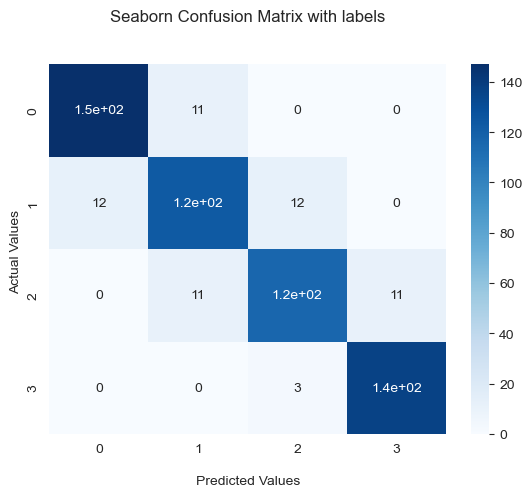

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
#Evaluating metrics for train
from sklearn.metrics import classification_report
print('Classification Report for logistic regression(train set)')
print(classification_report(y_pred_train,y_train))

Classification Report for logistic regression(train set)
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       345
           1       0.87      0.91      0.89       320
           2       0.88      0.92      0.90       331
           3       0.99      0.94      0.96       362

    accuracy                           0.93      1358
   macro avg       0.93      0.93      0.93      1358
weighted avg       0.93      0.93      0.93      1358



## Random Forest Classifier

In [33]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
     


In [34]:
clsr = RandomForestClassifier(n_estimators = 100) #taking 100 trees
clsr.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = clsr.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
test_score

0.888507718696398

In [36]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train,y_pred_train)
train_score

1.0

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       158
           1       0.83      0.86      0.84       147
           2       0.88      0.80      0.84       138
           3       0.93      0.94      0.94       140

    accuracy                           0.89       583
   macro avg       0.89      0.89      0.89       583
weighted avg       0.89      0.89      0.89       583



[[147  11   0   0]
 [ 12 123  12   0]
 [  0  11 116  11]
 [  0   0   3 137]]


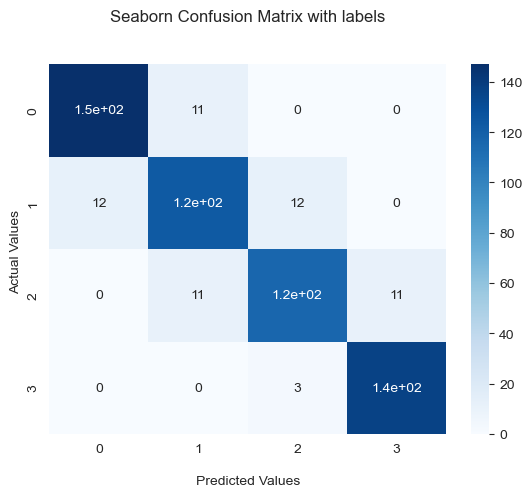

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       336
           2       1.00      1.00      1.00       346
           3       1.00      1.00      1.00       345

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



## Decision Tree

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
     

In [41]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [42]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score
     

0.8987993138936535

In [43]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       158
           1       0.83      0.89      0.86       147
           2       0.90      0.82      0.86       138
           3       0.94      0.94      0.94       140

    accuracy                           0.90       583
   macro avg       0.90      0.90      0.90       583
weighted avg       0.90      0.90      0.90       583



[[148  10   0   0]
 [ 11 131   5   0]
 [  0  17 113   8]
 [  0   0   8 132]]


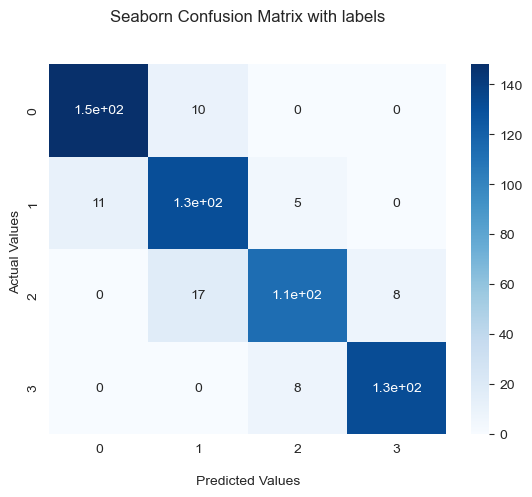

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,Ram,0.460609
1,Battery_power,0.072660
2,pixel_height,0.058440
3,pixel_width,0.054733
4,Mobile_width,0.040939


### Hyperparameter tuning for Random forest

In [47]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)
     

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [48]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features=4, max_leaf_nodes=40,
                       n_estimators=200)

In [50]:
clsr.best_score_
     

0.8645028335909325

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)
     

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [52]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9125964010282777

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.85      0.88      0.87        95
           2       0.90      0.84      0.87        90
           3       0.97      0.95      0.96        96

    accuracy                           0.91       389
   macro avg       0.91      0.91      0.91       389
weighted avg       0.91      0.91      0.91       389



[[104   4   0   0]
 [  8  84   3   0]
 [  0  11  76   3]
 [  0   0   5  91]]


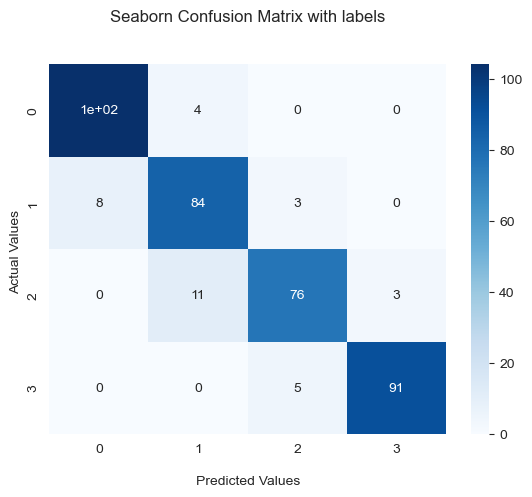

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


## Xgboost

In [59]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.2)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)
     

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.88      0.89      0.89        95
           2       0.86      0.87      0.86        90
           3       0.94      0.94      0.94        96

    accuracy                           0.91       389
   macro avg       0.91      0.91      0.91       389
weighted avg       0.91      0.91      0.91       389



In [60]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)
     

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       388
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       389

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552



#### Cross Validation

In [61]:
grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.849 total time=   0.0s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.0s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.868 total time=   0.0s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.881 total time=   0.0s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

[CV 1/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.875 total time=   0.0s
[CV 2/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 2/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.865 total time=   0.0s
[CV 3/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.881 total time=   0.0s
[CV 4/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.897 total time=   0.0s
[CV 5/5; 9/120] START gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 9/120] END gamma=1.5, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.881 total tim

[CV 3/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.903 total time=   0.3s
[CV 4/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.906 total time=   0.3s
[CV 5/5; 16/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 16/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.916 total time=   0.3s
[CV 1/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5;, score=0.875 total time=   0.3s
[CV 2/5; 17/120] START gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 17/120] END gamma=1.5, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 5/5; 23/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.910 total time=   0.3s
[CV 1/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.897 total time=   0.3s
[CV 2/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.3s
[CV 3/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 3/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.890 total time=   0.3s
[CV 4/5; 24/120] START gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 4/5; 24/120] END gamma=1.5, learning_rate=0.5, max_depth=10, n_estimators=200, s

[CV 3/5; 31/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.845 total time=   0.0s
[CV 4/5; 31/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 4/5; 31/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.832 total time=   0.0s
[CV 5/5; 31/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 5/5; 31/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.845 total time=   0.0s
[CV 1/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 1/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.842 total time=   0.0s
[CV 2/5; 32/120] START gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.5
[CV 2/5; 32/120] END gamma=1.5, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 4/5; 38/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.829 total time=   0.0s
[CV 5/5; 38/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5
[CV 5/5; 38/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.858 total time=   0.0s
[CV 1/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 1/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.852 total time=   0.0s
[CV 2/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 2/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8;, score=0.820 total time=   0.0s
[CV 3/5; 39/120] START gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.8
[CV 3/5; 39/120] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=

[CV 1/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.849 total time=   0.8s
[CV 2/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 2/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.833 total time=   0.8s
[CV 3/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 3/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.858 total time=   0.8s
[CV 4/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 4/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3;, score=0.868 total time=   0.8s
[CV 5/5; 46/120] START gamma=1.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 5/5; 46/120] END gamma=1.5, learning_rate=0.01, max_depth=10, n_estimato

[CV 2/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.804 total time=   0.8s
[CV 3/5; 53/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 3/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.839 total time=   0.8s
[CV 4/5; 53/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 4/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.826 total time=   0.8s
[CV 5/5; 53/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 5/5; 53/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.874 total time=   0.8s
[CV 1/5; 54/120] START gamma=1.5, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.8
[CV 1/5; 54/120] END gamma=1.5, learning_rate=0.001, max_depth=5, n_estimato

[CV 3/5; 60/120] END gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.861 total time=   1.4s
[CV 4/5; 60/120] START gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8
[CV 4/5; 60/120] END gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.855 total time=   1.3s
[CV 5/5; 60/120] START gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8
[CV 5/5; 60/120] END gamma=1.5, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.884 total time=   1.3s
[CV 1/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.823 total time=   0.0s
[CV 2/5; 61/120] START gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 61/120] END gamma=1.8, learning_rate=1, max_depth=5, n_estimators=10, subsamp

[CV 2/5; 68/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.849 total time=   0.0s
[CV 3/5; 68/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5
[CV 3/5; 68/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.887 total time=   0.0s
[CV 4/5; 68/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5
[CV 4/5; 68/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.877 total time=   0.0s
[CV 5/5; 68/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5
[CV 5/5; 68/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.5;, score=0.861 total time=   0.0s
[CV 1/5; 69/120] START gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8
[CV 1/5; 69/120] END gamma=1.8, learning_rate=1, max_depth=10, n_estimators=10, subsample=0.8;, score=0.894 

[CV 1/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.868 total time=   0.3s
[CV 2/5; 76/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 2/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.904 total time=   0.3s
[CV 3/5; 76/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 3/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.903 total time=   0.3s
[CV 4/5; 76/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3;, score=0.906 total time=   0.3s
[CV 5/5; 76/120] START gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 76/120] END gamma=1.8, learning_rate=0.5, max_depth=5, n_estimators=200, subsample=

[CV 3/5; 83/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.900 total time=   0.2s
[CV 4/5; 83/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5
[CV 4/5; 83/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.906 total time=   0.3s
[CV 5/5; 83/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5
[CV 5/5; 83/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.5;, score=0.916 total time=   0.3s
[CV 1/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8;, score=0.897 total time=   0.3s
[CV 2/5; 84/120] START gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 84/120] END gamma=1.8, learning_rate=0.5, max_depth=10, n_estimators=200, s

[CV 5/5; 90/120] END gamma=1.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8;, score=0.906 total time=   0.3s
[CV 1/5; 91/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 1/5; 91/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.846 total time=   0.0s
[CV 2/5; 91/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 2/5; 91/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.823 total time=   0.0s
[CV 3/5; 91/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 3/5; 91/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3;, score=0.842 total time=   0.0s
[CV 4/5; 91/120] START gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=0.3
[CV 4/5; 91/120] END gamma=1.8, learning_rate=0.1, max_depth=10, n_estimators=10, subsample=

[CV 1/5; 98/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.842 total time=   0.0s
[CV 2/5; 98/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5
[CV 2/5; 98/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.797 total time=   0.0s
[CV 3/5; 98/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5
[CV 3/5; 98/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.832 total time=   0.0s
[CV 4/5; 98/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5
[CV 4/5; 98/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5;, score=0.832 total time=   0.0s
[CV 5/5; 98/120] START gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=0.5
[CV 5/5; 98/120] END gamma=1.8, learning_rate=0.01, max_depth=5, n_estimators=10, subsample=

[CV 2/5; 105/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8;, score=0.836 total time=   0.0s
[CV 3/5; 105/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8
[CV 3/5; 105/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8;, score=0.855 total time=   0.0s
[CV 4/5; 105/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8
[CV 4/5; 105/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8;, score=0.845 total time=   0.0s
[CV 5/5; 105/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8
[CV 5/5; 105/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=10, subsample=0.8;, score=0.887 total time=   0.0s
[CV 1/5; 106/120] START gamma=1.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.3
[CV 1/5; 106/120] END gamma=1.8, learning_rate=0.01, max_depth=10, n_estima

[CV 3/5; 112/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.3;, score=0.835 total time=   0.7s
[CV 4/5; 112/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 112/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.3;, score=0.819 total time=   0.7s
[CV 5/5; 112/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 112/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.3;, score=0.865 total time=   0.7s
[CV 1/5; 113/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 1/5; 113/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5;, score=0.846 total time=   0.8s
[CV 2/5; 113/120] START gamma=1.8, learning_rate=0.001, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 113/120] END gamma=1.8, learning_rate=0.001, max_depth=5, n

[CV 4/5; 119/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.5;, score=0.842 total time=   1.0s
[CV 5/5; 119/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.5
[CV 5/5; 119/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.5;, score=0.887 total time=   1.0s
[CV 1/5; 120/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8
[CV 1/5; 120/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.871 total time=   1.2s
[CV 2/5; 120/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8
[CV 2/5; 120/120] END gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8;, score=0.830 total time=   1.1s
[CV 3/5; 120/120] START gamma=1.8, learning_rate=0.001, max_depth=10, n_estimators=200, subsample=0.8
[CV 3/5; 120/120] END gamma=1.8, learning_rate=0.001, max_de

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [63]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)
     

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.87      0.92      0.89        95
           2       0.91      0.88      0.89        90
           3       0.97      0.96      0.96        96

    accuracy                           0.93       389
   macro avg       0.93      0.93      0.93       389
weighted avg       0.93      0.93      0.93       389



[[103   5   0   0]
 [  4  87   4   0]
 [  0   8  79   3]
 [  0   0   4  92]]


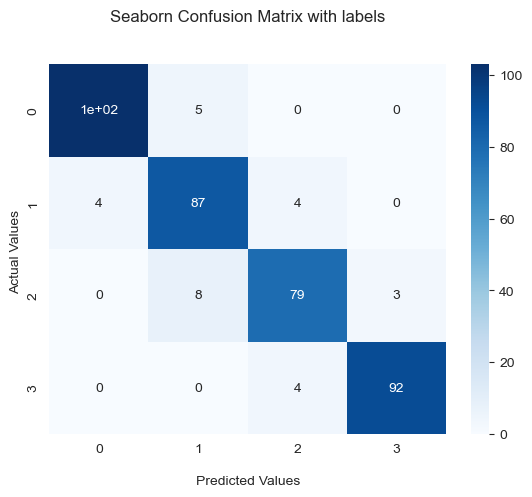

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     

In [65]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)
     

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       381
           1       0.97      0.98      0.97       388
           2       0.98      0.97      0.98       394
           3       0.99      0.99      0.99       389

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552

